In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importando DataSet

In [4]:
dataset = pd.read_csv('Employee_Compensation_SF.csv', sep=',')
dataset.head()

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2016,1,Public Protection,DAT,District Attorney,311.0,Municipal Attorneys' Association,8100,Legal & Court,...,49919,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,Calendar,2013,5,Culture & Recreation,ART,Arts Commission,790.0,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",...,1225,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,Calendar,2015,4,Community Health,DPH,Public Health,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,34873,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,Fiscal,2015,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2200,Medical & Dental,...,51145,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,Fiscal,2014,5,Culture & Recreation,REC,Recreation and Park Commission,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,...,48705,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


## Colunas Removidas

 - 1 Codes - removido por estar representado em outras colunas
 
 - 2 Employee Identifier - é um ID da tupla e não faz sentido usá-lo para predições
 
 - 3 Colunas relacionadas ao salário total - são valores que somados constituem a variável alvo (Total Compensation).
 
 - 4 Colunas relacionadas aos benefícios -são valores que somados constituem a variável alvo (Total Compensation).

In [5]:
to_be_removed = [
    'Organization Group Code',
    'Department Code',
    'Union Code',
    'Job Family Code',
    'Job Code',
    'Employee Identifier',
    'Retirement',
    'Health/Dental',
    'Other Benefits',
    'Salaries',
    'Overtime',
    'Other Salaries',
    'Total Salary',
    'Total Benefits']
ds = dataset.drop(to_be_removed,axis=1)
ds.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Total Compensation
0,Fiscal,2016,Public Protection,District Attorney,Municipal Attorneys' Association,Legal & Court,Attorney (Civil/Criminal),159436.65
1,Calendar,2013,Culture & Recreation,Arts Commission,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",Senior Management Assistant,120054.05
2,Calendar,2015,Community Health,Public Health,"SEIU - Human Services, Local 1021",Human Services,Eligibility Worker,13868.64
3,Fiscal,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Medical & Dental,Dental Aide,3718.50
4,Fiscal,2014,Culture & Recreation,Recreation and Park Commission,"SEIU - Miscellaneous, Local 1021",Recreation,Recreation Leader,10128.64


# Exploring Data

In [6]:
ds['Department'].value_counts()

Public Health                             63511
Municipal Transportation Agency           42574
Human Services                            24041
Police                                    23078
Recreation and Park Commission            16298
Airport Commission                        13682
Fire Department                           11761
General Services Agency - Public Works    11114
Sheriff                                    7557
General Services Agency - City Admin       7373
PUC Public Utilities Commission            6816
Public Library                             6668
PUC Water Department                       5910
PUC Wastewater Enterprise                  4225
Superior Court                             4001
PUC Hetch Hetchy                           2980
Juvenile Probation                         2396
City Attorney                              2372
Department of Building Inspection          2280
District Attorney                          2169
Department of Emergency Management      

In [7]:
ds['Job Family'].value_counts()

Nursing                           30278
Street Transit                    23964
Police Services                   19223
Journeyman Trade                  17283
Public Service Aide               15549
Human Services                    14926
Clerical, Secretarial & Steno     13403
Fire Services                     11191
Management                         9566
Housekeeping & Laundry             9479
Professional Engineering           8440
Recreation                         8308
Protection & Apprehension          8176
Correction & Detention             7850
Budget, Admn & Stats Analysis      7771
Information Systems                6621
Legal & Court                      6546
Payroll, Billing & Accounting      6169
Med Therapy & Auxiliary            5773
Library                            5366
Lab, Pharmacy & Med Techs          4924
Personnel                          4210
SF Superior Court                  4141
Sub-Professional Engineering       3977
Semi-Skilled & General Labor       3840


/usr/lib64/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


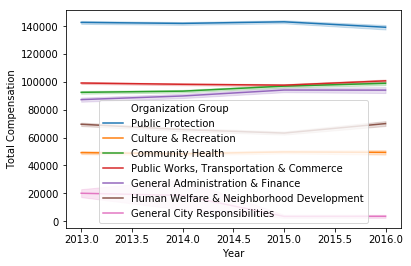

In [8]:
sns.lineplot(x='Year',y='Total Compensation',hue='Organization Group',data=ds)

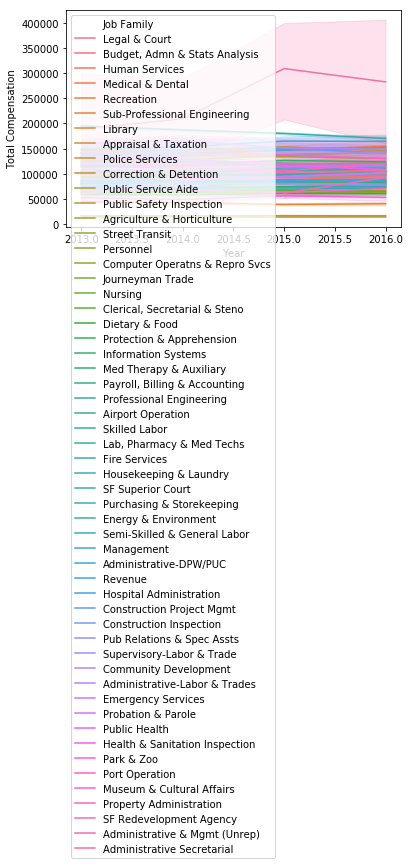

In [10]:
sns.lineplot(x='Year',y='Total Compensation',hue='Job Family',data=ds)

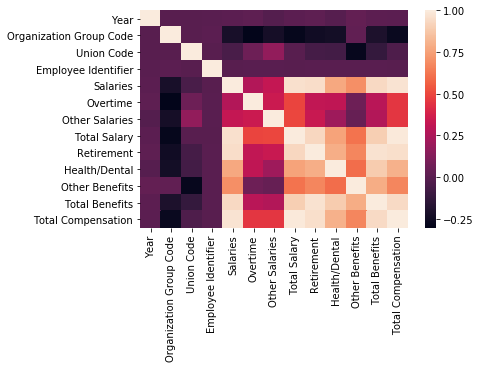

In [11]:
sns.heatmap(dataset.corr())

## Dropando as observações que possuem algum dado faltando

In [12]:
ds[ds.isnull().any(axis=1)].shape

(45, 8)

In [13]:
ds.drop(ds[ds.isnull().any(axis=1)].index, inplace=True)

In [14]:
ds.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Total Compensation
0,Fiscal,2016,Public Protection,District Attorney,Municipal Attorneys' Association,Legal & Court,Attorney (Civil/Criminal),159436.65
1,Calendar,2013,Culture & Recreation,Arts Commission,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",Senior Management Assistant,120054.05
2,Calendar,2015,Community Health,Public Health,"SEIU - Human Services, Local 1021",Human Services,Eligibility Worker,13868.64
3,Fiscal,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Medical & Dental,Dental Aide,3718.50
4,Fiscal,2014,Culture & Recreation,Recreation and Park Commission,"SEIU - Miscellaneous, Local 1021",Recreation,Recreation Leader,10128.64


In [15]:
print(
    len(np.unique(ds['Job'])),
    len(np.unique(ds['Job Family']))
)

(1136, 55)


In [16]:
def transform_string_boolen_to_int(x):
    if x == 'Fiscal':
        retorno = 1
    elif x == 'Calendar':
        retorno = 0
    else:
        retorno = x
    return retorno

In [17]:
extract_columns = ['Job','Job Family','Department','Organization Group', 'Union']

_ds = pd.get_dummies(ds, columns=extract_columns, prefix=extract_columns)
_ds.head()

,Year Type,Year,Total Compensation,Job_Account Clerk,Job_Accountant I,Job_Accountant II,Job_Accountant II (OCII),Job_Accountant III,Job_Accountant III (OCII),Job_Accountant IV,...,"Union_Stationary Engineers, Local 39","Union_Teamsters - Miscellaneous, Local 856","Union_Teamsters - Supervising Nurses, Local 856","Union_Teamsters, Local 853","Union_Theatrical and Stage Employees, Local 16","Union_Transport Workers - Auto Svc Workers, Local 250-A","Union_Transport Workers - Fare Inspectors, Local 250-A","Union_Transport Workers - Miscellaneous, Local 250-A","Union_Transport Workers - Transit Operators, Local 250-A","Union_Transportation Workers, Local 200"
0,Fiscal,2016,159436.65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Calendar,2013,120054.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Calendar,2015,13868.64,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fiscal,2015,3718.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fiscal,2014,10128.64,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
_ds['Year Type'] = _ds['Year Type'].apply(transform_string_boolen_to_int)
_ds.head()

,Year Type,Year,Total Compensation,Job_Account Clerk,Job_Accountant I,Job_Accountant II,Job_Accountant II (OCII),Job_Accountant III,Job_Accountant III (OCII),Job_Accountant IV,...,"Union_Stationary Engineers, Local 39","Union_Teamsters - Miscellaneous, Local 856","Union_Teamsters - Supervising Nurses, Local 856","Union_Teamsters, Local 853","Union_Theatrical and Stage Employees, Local 16","Union_Transport Workers - Auto Svc Workers, Local 250-A","Union_Transport Workers - Fare Inspectors, Local 250-A","Union_Transport Workers - Miscellaneous, Local 250-A","Union_Transport Workers - Transit Operators, Local 250-A","Union_Transportation Workers, Local 200"
0,1,2016,159436.65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2013,120054.05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2015,13868.64,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2015,3718.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2014,10128.64,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
_ds.shape

(291780, 1327)

In [20]:
_ds.dtypes.value_counts()

uint8      1324
int64         2
float64       1
dtype: int64

In [21]:
drop_indices = np.random.choice(_ds.index, 191780, replace=False)
df_subset = _ds.drop(drop_indices)

In [22]:
df_subset.shape

(100000, 1327)

In [23]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [24]:
reg = linear_model.Ridge (alpha = .5)

In [25]:
X = df_subset.drop('Total Compensation',axis=1)
y = df_subset['Total Compensation']
X_train, X_test, y_train, y_test = train_test_split(X.values,y,test_size=0.33,random_state=42)

In [26]:
reg.fit(X_train, y_train) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
y_predict = reg.predict(X_test)

In [28]:
from sklearn.metrics import explained_variance_score

In [32]:
explained_variance_score(y_test, y_predict)

0.5685785595305508

In [37]:
for i in np.linspace(0,1,11):
    print "Para alpha "+str(i)
    reg = linear_model.Ridge (alpha = i)
    reg.fit(X_train, y_train) 
    y_predict = reg.predict(X_test)
    print "explained_variance_score = "+str(explained_variance_score(y_test, y_predict))

Para alpha 0.0
explained_variance_score = -3.258118978877815e+23
Para alpha 0.1
explained_variance_score = 0.5679320243824013
Para alpha 0.2
explained_variance_score = 0.5681838842725253
Para alpha 0.30000000000000004
explained_variance_score = 0.5683638674160838
Para alpha 0.4
explained_variance_score = 0.5684910696437618
Para alpha 0.5
explained_variance_score = 0.5685785595305508
Para alpha 0.6000000000000001
explained_variance_score = 0.5686355410158075
Para alpha 0.7000000000000001
explained_variance_score = 0.5686686591152277
Para alpha 0.8
explained_variance_score = 0.5686828165053892
Para alpha 0.9
explained_variance_score = 0.5686817001219735
Para alpha 1.0
explained_variance_score = 0.568668130040878
